In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [3]:
df = pd.read_csv('C:\\Users\\jk\\Desktop\\data science - infoshare\\projekt_SQL\\jdszr4-edc\\2-projekt-python\\dataset-normalized.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,1,1102,0,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,False,2,279,1,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,True,1,1373,1,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,False,2,1392,1,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,False,1,591,1,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,False,2,884,1,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,False,1,613,1,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,False,1,155,1,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,False,2,1023,0,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [4]:
eductaion_field_dict = dict(df.EducationField.value_counts())
eductaion_field_dict

{'Life Sciences': 606,
 'Medical': 464,
 'Marketing': 159,
 'Technical Degree': 132,
 'Other': 82,
 'Human Resources': 27}

In [5]:
education_levels_dict = dict(df.Education.value_counts())
education_levels_dict

{3: 572, 4: 398, 2: 282, 1: 170, 5: 48}

In [6]:
eductaion_field = list(eductaion_field_dict.keys())
eductaion_field

['Life Sciences',
 'Medical',
 'Marketing',
 'Technical Degree',
 'Other',
 'Human Resources']

In [7]:
education_levels = list(education_levels_dict.keys())
education_levels

[3, 4, 2, 1, 5]

In [8]:
for education in eductaion_field:
    vc = df[df['EducationField'] == education]['Education'].value_counts()
    print(f'Number of people educated in the field of {education} on each eductaion level: \n{vc}')

Number of people educated in the field of Life Sciences on each eductaion level: 
3    233
4    173
2    116
1     67
5     17
Name: Education, dtype: int64
Number of people educated in the field of Medical on each eductaion level: 
3    183
4    104
2     99
1     63
5     15
Name: Education, dtype: int64
Number of people educated in the field of Marketing on each eductaion level: 
3    59
4    52
2    24
1    14
5    10
Name: Education, dtype: int64
Number of people educated in the field of Technical Degree on each eductaion level: 
3    57
4    31
2    22
1    19
5     3
Name: Education, dtype: int64
Number of people educated in the field of Other on each eductaion level: 
4    33
3    24
2    19
1     5
5     1
Name: Education, dtype: int64
Number of people educated in the field of Human Resources on each eductaion level: 
3    16
4     5
5     2
2     2
1     2
Name: Education, dtype: int64


In [9]:
def plot_eductaion_salary(s: int, education_field, eductaion_level):
    
    edu_dict = dict(df[(df['EducationField'] == education_field) 
                       & (df['Education'] == eductaion_level)]['MonthlyIncome'].describe())
    
    employees = edu_dict['count']
    less = df[(df['EducationField'] == education_field) & (df['Education'] == eductaion_level) 
              & (df['MonthlyIncome'] < s)]['MonthlyIncome'].count()
    more = df[(df['EducationField'] == education_field) & (df['Education'] == eductaion_level)
              & (df['MonthlyIncome'] > s)]['MonthlyIncome'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    print(f'{less_p}% people having eductaion in {education_field} on level {eductaion_level} earns less than you,'
          f' {more_p}% of them earns more.')
    
    var = st.variation(df[(df['EducationField'] == education_field) 
                          & (df['Education'] == eductaion_level)]['MonthlyIncome'])
    
    if var > 0.15 and edu_dict['count'] >= 15:
        
        if s <= edu_dict['25%']:
            salary = df[(df['EducationField'] == education_field) 
                        & (df['Education'] == eductaion_level) 
                        & (df['MonthlyIncome'] <= edu_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to first quartile.'
            
        elif s <= edu_dict['50%']:
            salary = df[(df['EducationField'] == education_field) 
                        & (df['Education'] == eductaion_level) 
                        & (df['MonthlyIncome'] <= edu_dict['50%']) 
                        & (df['MonthlyIncome'] > edu_dict['25%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to second quartile.'
            
        elif s <= edu_dict['75%']:
            salary = df[(df['EducationField'] == education_field) 
                        & (df['Education'] == eductaion_level)
                        & (df['MonthlyIncome'] <= edu_dict['75%']) 
                        & (df['MonthlyIncome'] > edu_dict['50%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to third quartile.'
        else:
            salary = df[(df['EducationField'] == education_field) 
                        & (df['Education'] == eductaion_level)
                        & (df['MonthlyIncome'] > edu_dict['75%'])]['MonthlyIncome']
            plot_title = 'Your salary compared to fourth quartile.'
        
        plt.subplots(figsize=(8, 12))
        
        plt.subplot(211)
        sns.histplot(data=salary, bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
        plt.subplot(212)
        gen_sal = df[(df['EducationField'] == education_field) & (df['Education'] == eductaion_level)]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees with the same level of eductaion in the same eduction field.'
        sns.histplot(data=gen_sal, bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees'
              f' having education in {education_field}.')
        
        gen_sal = df[(df['EducationField'] == education_field)]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees with your eductaion.'
        sns.histplot(data=gen_sal, bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)

53.33% people having eductaion in Medical on level 5 earns less than you, 46.67% of them earns more.


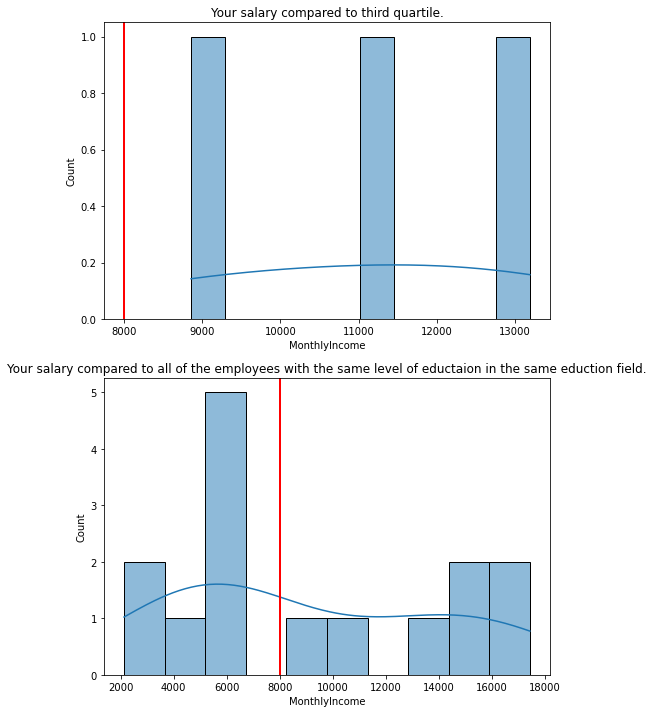

In [35]:
plot_eductaion_salary(8000, 'Medical', 5)

In [12]:
def plot_eductaion_job_level(s: int, education_field, eductaion_level):
    
    edu_dict = dict(df[(df['EducationField'] == education_field)
                       & (df['Education'] == eductaion_level)]['JobLevel'].describe())
    
    employees = edu_dict['count']
    less = df[(df['EducationField'] == education_field)
              & (df['Education'] == eductaion_level) 
              & (df['JobLevel'] < s)]['JobLevel'].count()
    more = df[(df['EducationField'] == education_field) 
              & (df['Education'] == eductaion_level) 
              & (df['JobLevel'] > s)]['JobLevel'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    print(f'{less_p}% people having eductaion in {education_field} on level {eductaion_level} are hired on lower job level,'
          f' {more_p}% of them is hired on higer job level.')
    
    var = st.variation(df[(df['EducationField'] == education_field) 
                          & (df['Education'] == eductaion_level)]['JobLevel'])
    
    if var > 0.10 and edu_dict['count'] >= 15:
        
        if s <= edu_dict['25%']:
            job_lvl = df[(df['EducationField'] == education_field) 
                         & (df['Education'] == eductaion_level)  
                         & (df['JobLevel'] <= edu_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to first quartile.'
        elif s <= edu_dict['50%']:
            job_lvl = df[(df['EducationField'] == education_field) 
                         & (df['Education'] == eductaion_level) 
                         & (df['JobLevel'] <= edu_dict['50%']) 
                         & (df['JobLevel'] > edu_dict['25%'])]['JobLevel']
            plot_title = 'Your job level compared to second quartile.'
        elif s <= edu_dict['75%']:
            job_lvl = df[(df['EducationField'] == education_field) 
                         & (df['Education'] == eductaion_level) 
                         & (df['JobLevel'] <= edu_dict['75%']) 
                         & (df['JobLevel'] > edu_dict['50%'])]['JobLevel']
            plot_title = 'Your job level compared to third quartile.'
        else:
            job_lvl = df[(df['EducationField'] == education_field) 
                         & (df['Education'] == eductaion_level)
                         & (df['JobLevel'] > edu_dict['75%'])]['JobLevel']
            plot_title = 'Your job level compared to fourth quartile.'
        
  
        plt.subplots(figsize=(8, 10))
       
        plt.subplot(211)
        sns.histplot(data=job_lvl, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
        plt.subplot(212)
        gen_job_lvl = df[(df['EducationField'] == education_field) 
                         & (df['Education'] == eductaion_level)]['JobLevel']
        gen_title = 'Your job level compared to all of the employees with the same level of eductaion in the same eduction field.'
        sns.histplot(data=gen_job_lvl, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees '
              f'having education in {education_field}.')
        
        gen_job_lvl = df[(df['EducationField'] == education_field)]['JobLevel']
        gen_title = 'Your job level compared to all of the employees with your eductaion.'
        sns.histplot(data=gen_job_lvl, bins=4, cumulative=True, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)

13.33% people having eductaion in Medical on level 5 are hired on lower job level, 46.67% of them is hired on higer job level.


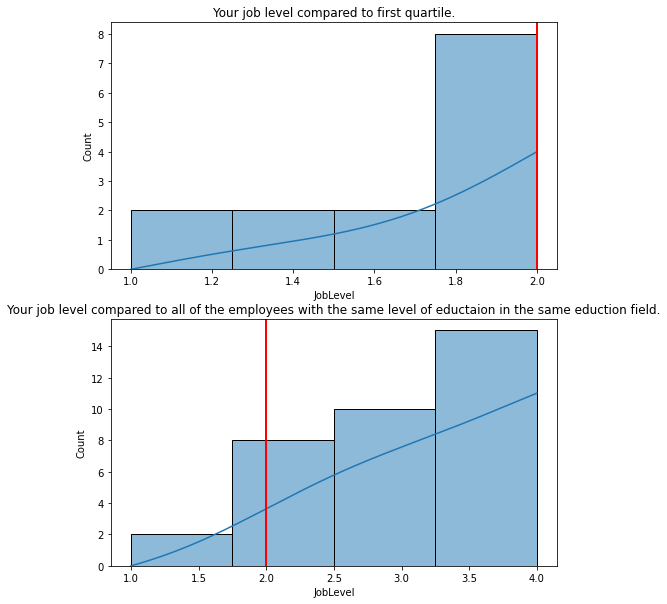

In [34]:
plot_eductaion_job_level(2, 'Medical', 5)

In [19]:
def plot_education_attrition(education_field: str, eductaion_level: int):
    df1 = df[(df['EducationField'] == education_field) & (df['Education'] == eductaion_level)]
    
    if df1['Attrition'].count() > 0 and len(df1['Attrition'].unique()) == 2:
        print("Showing Attrition statistic for people with the same eductaion level on the same education field")
        sns.displot(df1, x= 'EducationField', hue= 'Attrition', hue_order=[True, False])
    else:
        print("Not enough data for your education level in indicated education field. Shoiwng general data for your field")
        sns.displot(x='Education', hue='Attrition', data=df[df['EducationField'] == education_field], 
                    hue_order=[True, False])

Not enough data for your education level in indicated education field. Shoiwng general data for your field


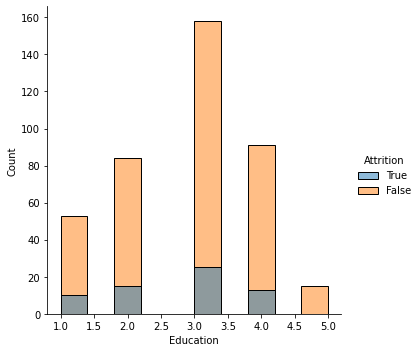

In [29]:
plot_education_attrition('Medical', 5)

Not enough data for your education level in indicated education field. Shoiwng general data for your field


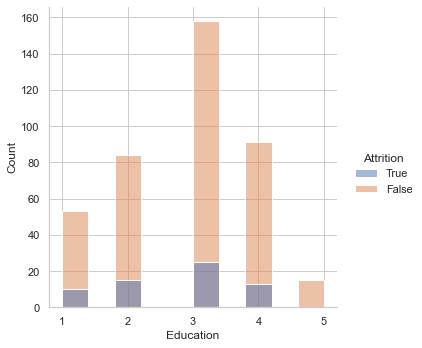

In [230]:
plot_attrition('Medical', 5)

In [24]:
def plot_education_overtme(education_field: str, education_level: int):
    df1 = df[(df['EducationField'] == education_field) & (df['Education'] == education_level)]
    
    if df1['OverTime'].count() > 0 and len(df1['OverTime'].unique()) == 2:
        print("Showing how many people with the same eductaion level on the same education field work over time")
        sns.displot(df1, x= 'EducationField', hue= 'OverTime', hue_order=[True, False])
    else:
        print("Not enough data for your education level in indicated education field. Shoiwng general data for your field")
        sns.displot(x='Education', hue='OverTime', data=df[df['EducationField'] == education_field], 
                    hue_order=[True, False])

Showing how many people with the same eductaion level on the same education field work over time


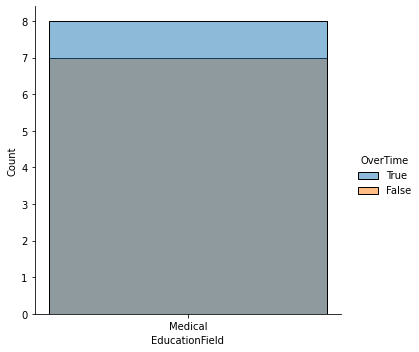

In [28]:
plot_education_overtme('Medical', 5)

In [37]:
def plot_satisfaction_education(js: int, rs: int, es:int, education_field: str, education_level: int):
    
#     wykres jak wypada podana pensja na tle pracownikow tej samej plci
    df1 = df[(df['EducationField']==education_field) & (df['Education'] == education_level)]
    job_sat_col = df1['JobSatisfaction'].mean()
    relationship_sat_col = df1['RelationshipSatisfaction'].mean()
    environment_sat_col = df1['EnvironmentSatisfaction'].mean()
    
    job_sat_you = js
    relationship_sat_you = rs
    environment_sat_you = es     
        
    if len(df1) >2: 
        w=0.2
        x = ['job satisfaction', 'relationship satisfaction', 'environment satisafction']
        you = [job_sat_you, relationship_sat_you, environment_sat_you]
        others = [job_sat_col, relationship_sat_col, environment_sat_col]
          
        bar1 = np.arange(len(x))
        bar2 = [i+w for i in bar1]


        plt.bar(bar1, you, w, label= 'you')
        plt.bar(bar2, others, w, label='others')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        plt.ylabel('Satsifaction Level')
        plt.xlabel('Satisfaction')
        plt.title('Your satisafction levels compared to satisfaction levels of people with the same level' 
                  ' of education in the same education field')
        plt.xticks(bar1+w/2, x)
        plt.legend()
        plt.show()
    else:
        print('Not enough data to show comparison')

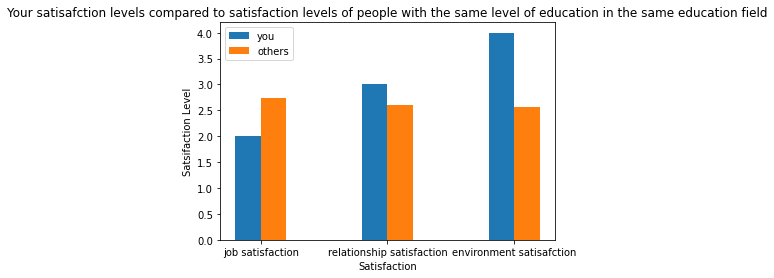

In [38]:
plot_satisfaction_education(2, 3, 4, 'Marketing', 4)

In [306]:
plot_satisfaction_education(2, 3, 4, 'Human Resources', 1)

Not enough data to show comparison
